
# Inu Neko Sales Data Exploration

This is the analysis of Inu Neko Sales Data, references used are as follows:
* [alicert](https://www.kaggle.com/datasets/alicert/ecommerce-online-sales-data-frame) Dataset from Kaggle
* [joshuaswords](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization) Viz Ideas
* [subinium](https://www.kaggle.com/code/subinium/awesome-visualization-with-titanic-dataset/notebook)  Viz Ideas
* [@awsmcolor](https://www.instagram.com/awsmcolor/?hl=en) Color Pallete Ideas


### Importing libraries

We'll be using these libraries:
* **numpy** for array related and some stats function
* **pandas** for data exploration and processing
* **seaborn** and **matplotlib** for visualization related

In [1]:
import numpy as np

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter

In [2]:
# read and check the data
df = pd.read_csv('inu_neko_orderline_clean.csv')
df.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95


In [3]:
# check the dtypes
df.dtypes

trans_id              int64
prod_upc              int64
cust_id               int64
trans_timestamp      object
trans_year            int64
trans_month           int64
trans_day             int64
trans_hour            int64
trans_quantity        int64
cust_age              int64
cust_state           object
prod_price          float64
prod_title           object
prod_category        object
prod_animal_type     object
total_sales         float64
dtype: object

In [4]:
# some engineering for date, split into date and time
import datetime as dt

# convert the timestamp to datetime
df['trans_timestamp']=pd.to_datetime(df['trans_timestamp'])

# create new column for date only
df['trans_date']=pd.to_datetime(df['trans_timestamp'].dt.date)
df['trans_date']

0       2021-01-01
1       2021-01-01
2       2021-01-01
3       2021-01-01
4       2021-01-01
           ...    
38218   2021-06-30
38219   2021-06-30
38220   2021-06-30
38221   2021-06-30
38222   2021-06-30
Name: trans_date, Length: 38223, dtype: datetime64[ns]

In [5]:
# create time column
df['trans_time'] = df['trans_timestamp'].dt.strftime('%H:%M')
df['trans_time']

0        07:35
1        09:33
2        09:33
3        09:33
4        09:33
         ...  
38218    15:37
38219    15:45
38220    15:57
38221    15:59
38222    17:30
Name: trans_time, Length: 38223, dtype: object

In [6]:
df.dtypes

trans_id                     int64
prod_upc                     int64
cust_id                      int64
trans_timestamp     datetime64[ns]
trans_year                   int64
trans_month                  int64
trans_day                    int64
trans_hour                   int64
trans_quantity               int64
cust_age                     int64
cust_state                  object
prod_price                 float64
prod_title                  object
prod_category               object
prod_animal_type            object
total_sales                float64
trans_date          datetime64[ns]
trans_time                  object
dtype: object

In [7]:
# check for null values
df.isna().sum()

trans_id            0
prod_upc            0
cust_id             0
trans_timestamp     0
trans_year          0
trans_month         0
trans_day           0
trans_hour          0
trans_quantity      0
cust_age            0
cust_state          0
prod_price          0
prod_title          0
prod_category       0
prod_animal_type    0
total_sales         0
trans_date          0
trans_time          0
dtype: int64

Data has been through cleaning phase, so the null values is 0 for all fields, this is Great!

Now we can continue to visualization exploration

## 1. Quick Distribution Visualization Check

We will use a color pallete courtesy of [@awsmcolor](https://www.instagram.com/awsmcolor/?hl=en) for color consistency.

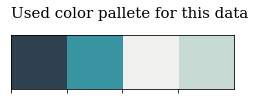

In [8]:
# Palette
sns.palplot(['#2f404f', '#3894a1', '#f0f1ee','#c7dad3'])

plt.title("Used color pallete for this data",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()


### Create quick function for quick visuals


In [9]:
df.groupby('prod_animal_type')['trans_quantity'].sum()

prod_animal_type
cat    30205
dog    22324
Name: trans_quantity, dtype: int64

In [11]:
def q_chart(feat):
    agg_list = ['trans_quantity', 'total_sales']

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    for i in range(2):
        df_group = df.groupby(feat)[agg_list[i]].sum().sort_values(ascending=False)[:10]
        ax[i].bar(df_group.index, df_group, width=0.5, 
               edgecolor='darkgray',
               linewidth=0.6,
                color='#3894a1')
        ax[i].set_xticklabels(df_group.index, rotation=90)
        ax[i].set_ylabel(agg_list[i])
    
    fig.text(0.4, 0.93, f'Quantity vs Sales for {feat}', fontsize=12, fontweight='bold')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=None)
    plt.show()

C:\Users\edwin\AppData\Local\Temp/ipykernel_17452/297296699.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(df_group.index, rotation=90)


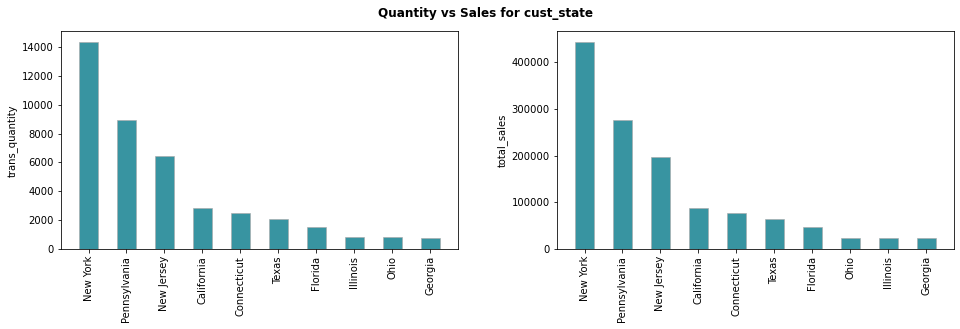

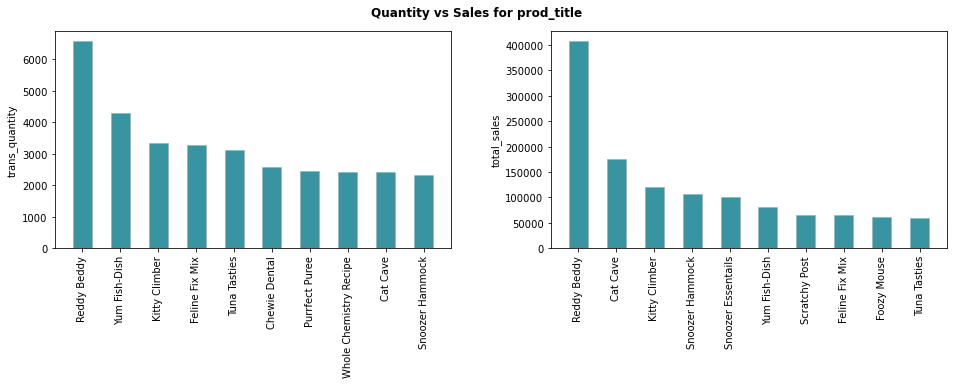

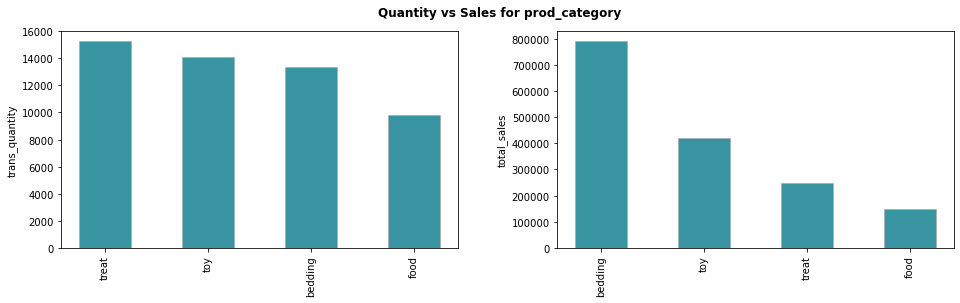

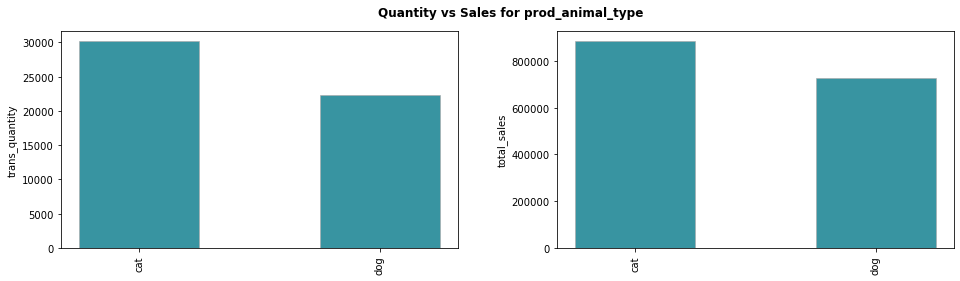

In [12]:
# select only object type columns for the bars
for column in df:
    if df[column].dtype == 'object' and column!= 'trans_time':
        q_chart(column)   

### From this quick plot we can already get a couple of things :

* **New York** state have most bought items and highest sales value.
* **Reddy Beddy** are the most bought item and highest sales value.
* **Treats** are the most bought categories, but **Bedding** have highest sales value.
* And lastly **CATs** related products is the most bought products.

Overall most of the top items sold members align with the highest sales members.

The product categories are interesting. 
**Bedding** highest sale value, but with only number 3 in sale quantity.

Lets see what is the average price for this categories

### Checking the average price of product categories

In [13]:
df_price = df.groupby('prod_category')['prod_price'].mean()
df_price.sort_values(ascending=False)

prod_category
bedding    59.221242
toy        29.865469
treat      16.152267
food       15.324690
Name: prod_price, dtype: float64

Confirmed, **bedding** categories have **higher price average** than other categories 


### 2. Plotting Monthly Sales


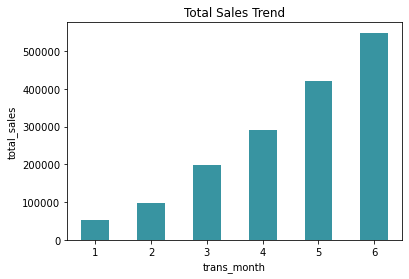

In [14]:
df_group = df.groupby('trans_month')['total_sales'].sum().to_frame

df.groupby('trans_month')['total_sales'].sum().plot(kind='bar', color='#3894a1', title='Total Sales Trend')
plt.ylabel('total_sales')
plt.xticks(rotation=0)
plt.show()


### 3. Segmenting Customer using RFM Method

**RFM** (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. 
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.



### Recency

To calculate recency, we need to choose a date point from which we evaluate **how many days ago was the customer's last purchase**.


In [15]:
#last date available in our dataset
df['trans_date'].max()

Timestamp('2021-06-30 00:00:00')


The last date we have is 2021-06-30 so we will use it as reference.


In [16]:
now = pd.to_datetime(dt.date(2021,6,30))
print(now)

2021-06-30 00:00:00


In [17]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='cust_id', as_index=False)['trans_date'].max()
recency_df.columns = ['cust_id','last_purchase_date']
recency_df.head()

,cust_id,last_purchase_date
0,1001012,2021-05-31
1,1001013,2021-05-20
2,1001014,2021-05-18
3,1001015,2021-01-01
4,1001016,2021-06-09


In [18]:
#calculate recency
recency_df['Recency'] = recency_df['last_purchase_date'].apply(lambda x: (now - x))

In [19]:
# checking recency dtype
recency_df.dtypes

cust_id                         int64
last_purchase_date     datetime64[ns]
Recency               timedelta64[ns]
dtype: object

In [20]:
# converting timedelta to int 64
recency_df['Recency'] = recency_df['Recency'].dt.days.astype('int64')
recency_df.dtypes

cust_id                        int64
last_purchase_date    datetime64[ns]
Recency                        int64
dtype: object

In [21]:
#drop last_purchase_date as we don't need it anymore
recency_df.drop('last_purchase_date',axis=1,inplace=True)


### Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check **how many invoices are registered by the same customer**.


In [22]:
# drop duplicates
df_copy = df
df_copy.drop_duplicates(subset=['trans_id', 'cust_id'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = df_copy.groupby(by=['cust_id'], as_index=False)['trans_id'].count()
frequency_df.columns = ['cust_id','Frequency']
frequency_df.head()

,cust_id,Frequency
0,1001012,2
1,1001013,1
2,1001014,3
3,1001015,1
4,1001016,2



### Monetary

Monetary attribute answers the question: **How much money did the customer spent over time?**


In [23]:
monetary_df = df.groupby(by='cust_id',as_index=False).agg({'total_sales': 'sum'})
monetary_df.columns = ['cust_id','Monetary']
monetary_df.head()

,cust_id,Monetary
0,1001012,34.90
1,1001013,60.99
2,1001014,71.95
3,1001015,18.95
4,1001016,70.94



### Create RFM Table


In [24]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='cust_id')
temp_df.head()

,cust_id,Recency,Frequency
0,1001012,30,2
1,1001013,41,1
2,1001014,43,3
3,1001015,180,1
4,1001016,21,2


In [25]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='cust_id')
#use CustomerID as index
rfm_df.set_index('cust_id',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
cust_id,,,
1001012,30,2,34.90
1001013,41,1,60.99
1001014,43,3,71.95
1001015,180,1,18.95
1001016,21,2,70.94


In [26]:
### RFM Table Checking verification

In [27]:
df[df['cust_id']==1001012]

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales,trans_date,trans_time
5,10300091,344934101144,1001012,2021-01-01 10:08:32.241027,2021,1,1,1,1,26,New Jersey,24.95,Fetch Blaster,toy,dog,24.95,2021-01-01,10:08
24822,10318195,287663658863,1001012,2021-05-31 11:36:37.378388,2021,5,31,31,1,26,New Jersey,9.95,All Veggie Yummies,treat,dog,9.95,2021-05-31,11:36


In [28]:
(now - pd.to_datetime(dt.date(2021,5,31)))

Timedelta('30 days 00:00:00')


### Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use ** Tertiles**. We assign a score from 1 to 3 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.


### RFM Tertiles

In [29]:
tertiles = rfm_df.quantile(q=[0.33,0.66])
tertiles

,Recency,Frequency,Monetary
0.33,22.0,1.0,24.95
0.66,57.0,1.0,59.97



### Creation of RFM Segments

Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

**Best Customers - Champions**: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".


In [30]:
# Arguments (x = value, p = recency or monetary_value or frequency, d = tertiles dict)
def RScore(x,p,d):
    if x <= d[p][0.33]:
        return 3
    elif x <= d[p][0.66]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency or monetary_value or frequency, k = tertiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.33]:
        return 1
    elif x <= d[p][0.66]:
        return 2
    else:
        return 3

In [31]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Tertile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',tertiles,))
rfm_segmentation['F_Tertile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',tertiles,))
rfm_segmentation['M_Tertile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',tertiles,))

In [32]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Tertile.map(str) \
                            + rfm_segmentation.F_Tertile.map(str) \
                            + rfm_segmentation.M_Tertile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score
cust_id,,,,,,,
1001012,30,2,34.90,2,3,2,232
1001013,41,1,60.99,2,1,3,213
1001014,43,3,71.95,2,3,3,233
1001015,180,1,18.95,1,1,1,111
1001016,21,2,70.94,3,3,3,333


In [33]:
# create segmentation classification
# NOTE : This can be later customized depending on business needs

segment_name = {'112':'ABOUT TO SLEEP',
                '113':'ABOUT TO SLEEP', 
                '121':'ABOUT TO SLEEP',
                '122':'ABOUT TO SLEEP',
                '131':'ABOUT TO SLEEP',
                
                '211':'ABOUT TO SLEEP',
                '212':'ABOUT TO SLEEP',
                '221':'ABOUT TO SLEEP', 

                '311':'RECENT CUSTOMER',
                '312':'RECENT CUSTOMER', 
                '313':'RECENT CUSTOMER',

                '123':'CANNOT LOOSE THEM',
                '132':'CANNOT LOOSE THEM', 
                '133':'CANNOT LOOSE THEM',

                '333':'CHAMPION',
                '111':'LOST CUSTOMER',

                '233':'LOYAL',
                '232':'LOYAL',
                '323':'LOYAL', 
                '332':'LOYAL',

                '223':'POTENTIAL LOYALIST',
                '223':'POTENTIAL LOYALIST', 
                '322':'POTENTIAL LOYALIST',
                '331':'POTENTIAL LOYALIST',

                '213':'AVERAGE',
                '222':'AVERAGE', 
                '231':'AVERAGE',
                '321':'AVERAGE'}

In [34]:
rfm_segmentation['segment_name'] = rfm_segmentation['RFM_Score'].map(segment_name)

In [35]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,segment_name
cust_id,,,,,,,,
1001012,30,2,34.90,2,3,2,232,LOYAL
1001013,41,1,60.99,2,1,3,213,AVERAGE
1001014,43,3,71.95,2,3,3,233,LOYAL
1001015,180,1,18.95,1,1,1,111,LOST CUSTOMER
1001016,21,2,70.94,3,3,3,333,CHAMPION


In [36]:
rfm_segmentation[['segment_name']].value_counts()

segment_name      
ABOUT TO SLEEP        7208
RECENT CUSTOMER       4738
LOST CUSTOMER         2638
LOYAL                 2570
CHAMPION              1670
AVERAGE               1238
CANNOT LOOSE THEM     1142
POTENTIAL LOYALIST      37
dtype: int64

<AxesSubplot:>

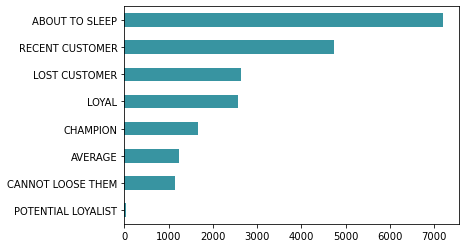

In [38]:
# ax = sns.countplot(y="segment_name", data=rfm_segmentation, linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor=".2")
rfm_segmentation['segment_name'].value_counts().sort_values().plot(kind = 'barh', color='#3894a1')

In [39]:
rfm_segmentation.groupby('segment_name')['Monetary'].sum().sort_values(ascending=False)

segment_name
ABOUT TO SLEEP        313023.71
LOYAL                 204534.70
CHAMPION              200364.01
RECENT CUSTOMER       198226.58
AVERAGE               113336.60
CANNOT LOOSE THEM     102590.49
LOST CUSTOMER          45663.04
POTENTIAL LOYALIST       851.94
Name: Monetary, dtype: float64


### Most of our customer are in the About To Sleep segment

Lets check the Monetary, Frequency and Recency figures


### Monetary

<AxesSubplot:ylabel='segment_name'>

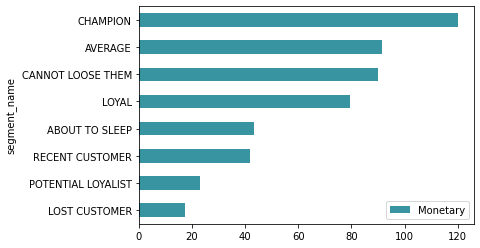

In [40]:
df_bar = rfm_segmentation.groupby('segment_name')['Monetary'].mean().to_frame()
df_bar.reset_index(inplace=True)
df_bar.sort_values('Monetary', ascending=True).plot(kind='barh', y='Monetary', x='segment_name', color='#3894a1')


Average monetary values still belongs to the **Champion** and **Average** segment,


### Frequency

<AxesSubplot:ylabel='segment_name'>

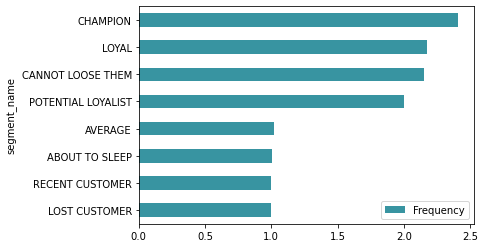

In [41]:
df_bar = rfm_segmentation.groupby('segment_name')['Frequency'].mean().to_frame()
df_bar.reset_index(inplace=True)
df_bar.sort_values('Frequency', ascending=True).plot(kind='barh', y='Frequency', x='segment_name', color='#3894a1')


Frequency top segment are **Champion** and **Loyal**



### Recency


<AxesSubplot:ylabel='segment_name'>

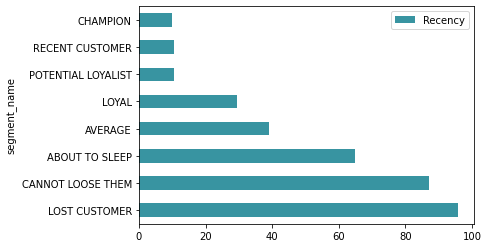

In [42]:
df_bar = rfm_segmentation.groupby('segment_name')['Recency'].mean().to_frame()
df_bar.reset_index(inplace=True)
df_bar.sort_values('Recency', ascending=False).plot(kind='barh', y='Recency', x='segment_name', color='#3894a1')


We can use this segmentation list to identify potential customers!

While also identify which customer to retain with **promotion, loyalty program and discount**


In [44]:
# Exporting the RFM Segmentation List for information to sales and promotion dept
rfm_segmentation.to_excel('Customer_RFM_Segmentation_List.xlsx')

### END